### Data Science

Group 17

Daniel Lucas  
Ricardo Nobre  
Ricardo Carvalho  
Diogo Torneiro  
Vasco Pombo  

### Imports

In [340]:
#basic libraries: numpy and pandasfor data handling, pyplot 
#and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


#dataset partition
from sklearn.model_selection import train_test_split

#feature selection methods
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#scaling methods and categorical variable encoder
from sklearn.preprocessing import RobustScaler, OneHotEncoder

#model selection 
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#linear models
from sklearn.linear_model import LogisticRegression, SGDClassifier

#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#k-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

#principal component analysis
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

#neural network
from sklearn.neural_network import MLPClassifier

#ensemble classifier models
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, \
VotingClassifier, AdaBoostClassifier, StackingClassifier, HistGradientBoostingClassifier, \
ExtraTreesClassifier

#support vector machines
from sklearn.svm import SVC

#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
make_scorer, classification_report, confusion_matrix, f1_score

from itertools import combinations
from collections import Counter

# Importing Data

In [263]:
train_data_original = pd.read_csv('train.csv')
test_data_original = pd.read_csv('test.csv')

In [264]:
df = train_data_original.copy()

# 1) Initial Data Exploration

| Variable      | Description |
| ----------- | ----------- |
| Name      | Customer’s name       |
| Year Birth    | Customer’s birth year        |
| Longevity   | Whether the customer registered more than 1 year ago or not        |
| Churn   | Whether the customer churned or not (churn or nochurn)        |
| TypeTravel   | Customer’s reason for travelling (business or leisure)        |
| RoomType   | Type of room reserved        |
| RewardPoints   | Customer’s rewarding point for loyalty        |
| Comfort   | Satisfaction level of customer regarding comfort of the room (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding reception schedule (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding food and drink available (0 to 5)        |
| Location   |   Satisfaction level of customer regarding accommodation location (0 to 5)      |
| Wifi   |    Satisfaction level of customer regarding wi-fi service (0 to 5)     |
| Amenities   | Satisfaction level of customer regarding accommodation amenities(0 to 5)        |
| Staff   | Satisfaction level of customer regarding staff (0 to 5)        |
| OnlineBooking   | Satisfaction level of customer regarding online booking ease(0 to 5)        |
| PriceQuality   | Satisfaction level of customer regarding price quality relationship (0 to 5)        |
| RoomSpace   | Satisfaction level of customer regarding room space (0 to 5)        |
| CheckOut   | Satisfaction level of customer regarding check-out (0 to 5)        |
| CheckIn   | Satisfaction level of customer regarding check-in (0 to 5)        |
| Cleanliness   | Satisfaction level of customer regarding cleanliness (0 to 5)        |
| BarService   | Satisfaction level of customer regarding bar service (0 to 5)        |

In [265]:
df_original_row_size = df.shape[0]
df_original_columns_size = df.shape[1]

print("Dataframe has", df_original_row_size, "rows and", df_original_columns_size, "columns")

Dataframe has 15589 rows and 22 columns


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,15589.0,7795.000000,4500.301008,1.0,3898.0,7795.0,11692.0,15589.0
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0


On a first look, we noticed the ranges of each variable look acceptable. However, some variables have different scales than others and this must be handled later on.

In [268]:
# Change the data frame index to the customer ID of each entry, rather than the standard index
df.set_index("Cust_ID", inplace = True)

# 2) Exploratory Data Analysis

### 2.1) Coherence Checks

#### 2.1.1) Churn

In [269]:
df['Churn'].value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

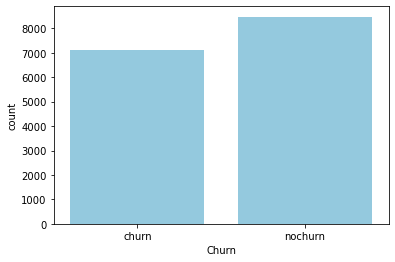

In [270]:
sns.countplot(df["Churn"], color="skyblue")
plt.show()

Churn is our target variable and it looks somewhat evenly distributed. We will still test with over and under sampled datasets but there is not a huge descrepancy between the values of Churn.

#### 2.1.2) Name

In [271]:
df['Name'].value_counts()

Mr. Michael Smith      9
Ms. Amanda Smith       7
Mr. John Smith         7
Ms. Jennifer Smith     6
Mr. Michael Davis      6
                      ..
Mr. Eric Silva         1
Ms. Lori Deleon        1
Ms. Joan Hebert        1
Ms. Kerry Armstrong    1
Mr. Joseph Blevins     1
Name: Name, Length: 14227, dtype: int64

Variable looks good tu us and based on the prefix before the name, we can create a new variable called gender.

#### 2.1.3) Longevity

In [272]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

Variable does not look good because we have entries with 'yes' and entries with 'y' which most likely mean the same. Will will transform the entries with 'y' into 'yes'

In [273]:
df['Longevity'].replace('y','yes', inplace=True)
df['Longevity'].value_counts()

yes    12715
no      2874
Name: Longevity, dtype: int64

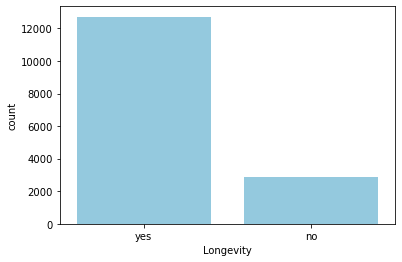

In [274]:
sns.countplot(df["Longevity"], color="skyblue")
plt.show()

#### 2.1.4) Year_Birth

Variable has missing values. We will handle these missing values and then create a new variable called Age based on this

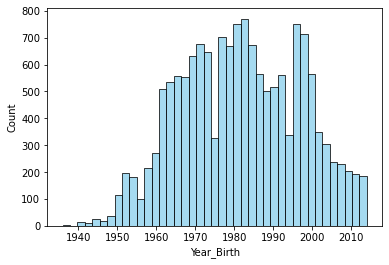

In [275]:
sns.histplot(df["Year_Birth"], color="skyblue")
plt.show()

#### 2.1.5) Type Travel

In [276]:
df['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

Variable looks good to us and we will create dummies for it

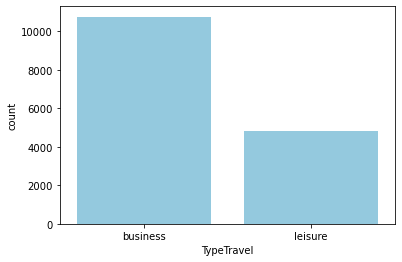

In [277]:
sns.countplot(df["TypeTravel"], color="skyblue")
plt.show()

#### 2.1.6) Room Type

In [278]:
df['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='RoomType', ylabel='count'>

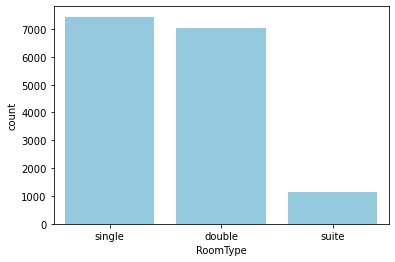

In [279]:
sns.countplot(df["RoomType"], color="skyblue")

#### 2.1.7) Reward Points

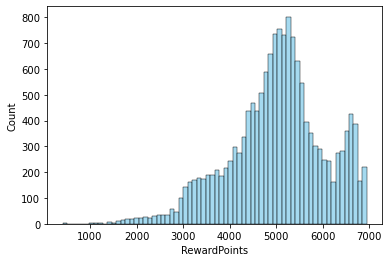

In [280]:
sns.histplot(df["RewardPoints"], color="skyblue")
plt.show()

Variable looks good but it needs to be scaled

#### 2.1.8) Ratings

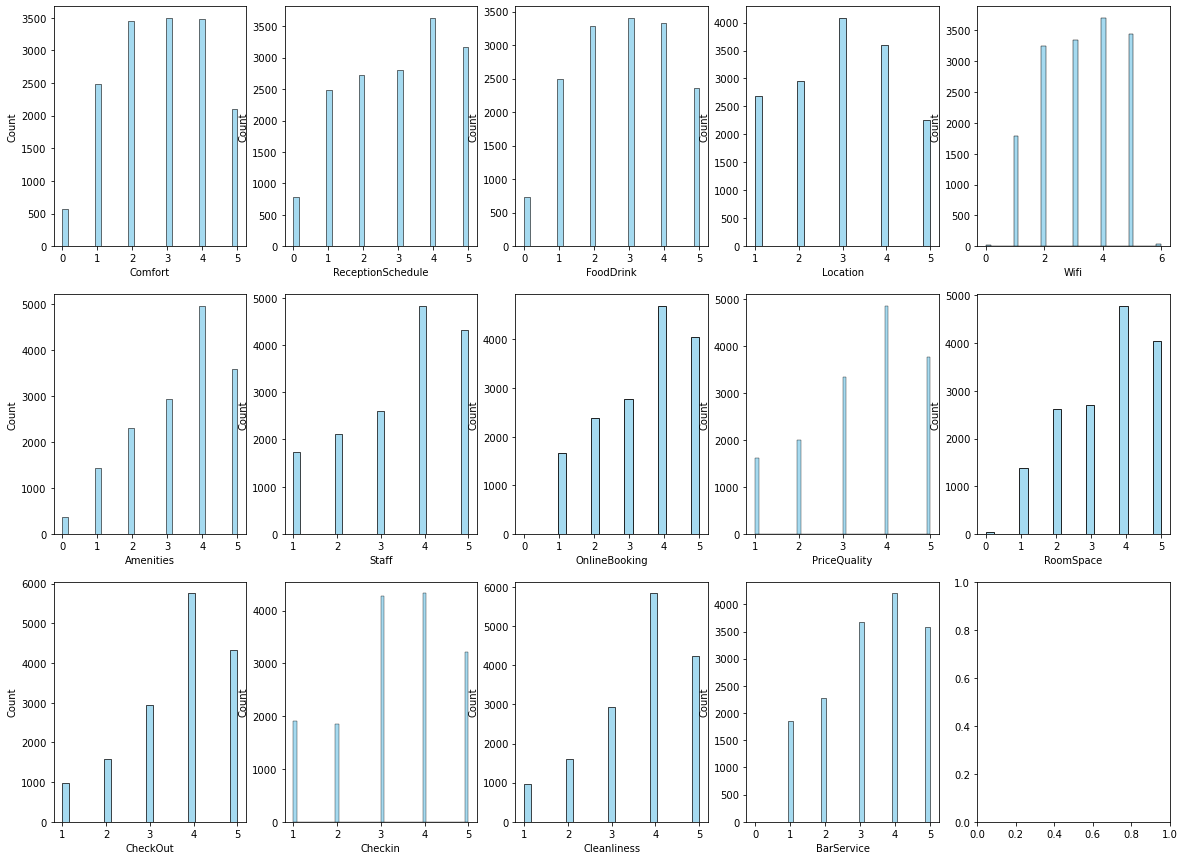

In [281]:
f, axes = plt.subplots(3,5, figsize=(20, 15), squeeze=False)  
sns.histplot(df["Comfort"], color="skyblue", ax=axes[0, 0])
sns.histplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 1])
sns.histplot(df["FoodDrink"], color="skyblue", ax=axes[0, 2])
sns.histplot(df["Location"], color="skyblue", ax=axes[0, 3])
sns.histplot(df["Wifi"], color="skyblue", ax=axes[0, 4])
sns.histplot(df["Amenities"], color="skyblue", ax=axes[1, 0])
sns.histplot(df["Staff"], color="skyblue", ax=axes[1, 1])
sns.histplot(df["OnlineBooking"], color="skyblue", ax=axes[1, 2])
sns.histplot(df["PriceQuality"], color="skyblue", ax=axes[1, 3])
sns.histplot(df["RoomSpace"], color="skyblue", ax=axes[1, 4])
sns.histplot(df["CheckOut"], color="skyblue", ax=axes[2, 0])
sns.histplot(df["Checkin"], color="skyblue", ax=axes[2, 1])
sns.histplot(df["Cleanliness"], color="skyblue", ax=axes[2, 2])
sns.histplot(df["BarService"], color="skyblue", ax=axes[2, 3])

plt.show()

Upon looking at the charts, we noticed that 'Wifi' has values that should not be there, in particular, some surveys were marked with 6 which is not an available rating. 

Since there are only 36 rows with value 6, we will convert them to a 5.

In [282]:
df['Wifi'].replace(6,5, inplace=True)

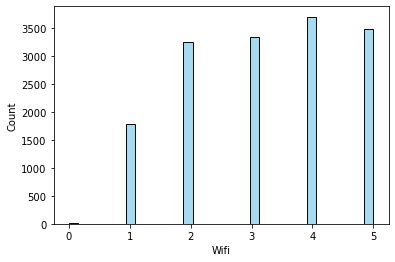

In [283]:
sns.histplot(df["Wifi"], color="skyblue")
plt.show()

### 2.2) Missing Values

In [284]:
df.isna().sum()

Churn                  0
Name                   0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

Year of Birth is the only variable with missing values. We have different methods to fill in these missing values like using the mode, mean or KNN Inputer. We decided to fill these missing values with the mode.

In [285]:
df_numerical = df.drop(columns=['Churn', 'RoomType', 'Longevity', 'TypeTravel', 'Name'])

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer_matrix = imputer.fit_transform(df_numerical)

data_cleaned = pd.DataFrame(data=imputer_matrix, columns = df_numerical.columns, index = df_numerical.index)
df['Year_Birth'] = data_cleaned['Year_Birth']

In [286]:
df.isna().sum()

Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

### 2.3) Duplicate Values

In [287]:
#create duplicate datafranme
duplicates = df.duplicated()

In [288]:
#visualize the duplicates
df[duplicates]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
8196,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9177,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9418,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [289]:
df.drop_duplicates(inplace = True)
df.shape

(15586, 21)

### 2.4) Handling Outliers

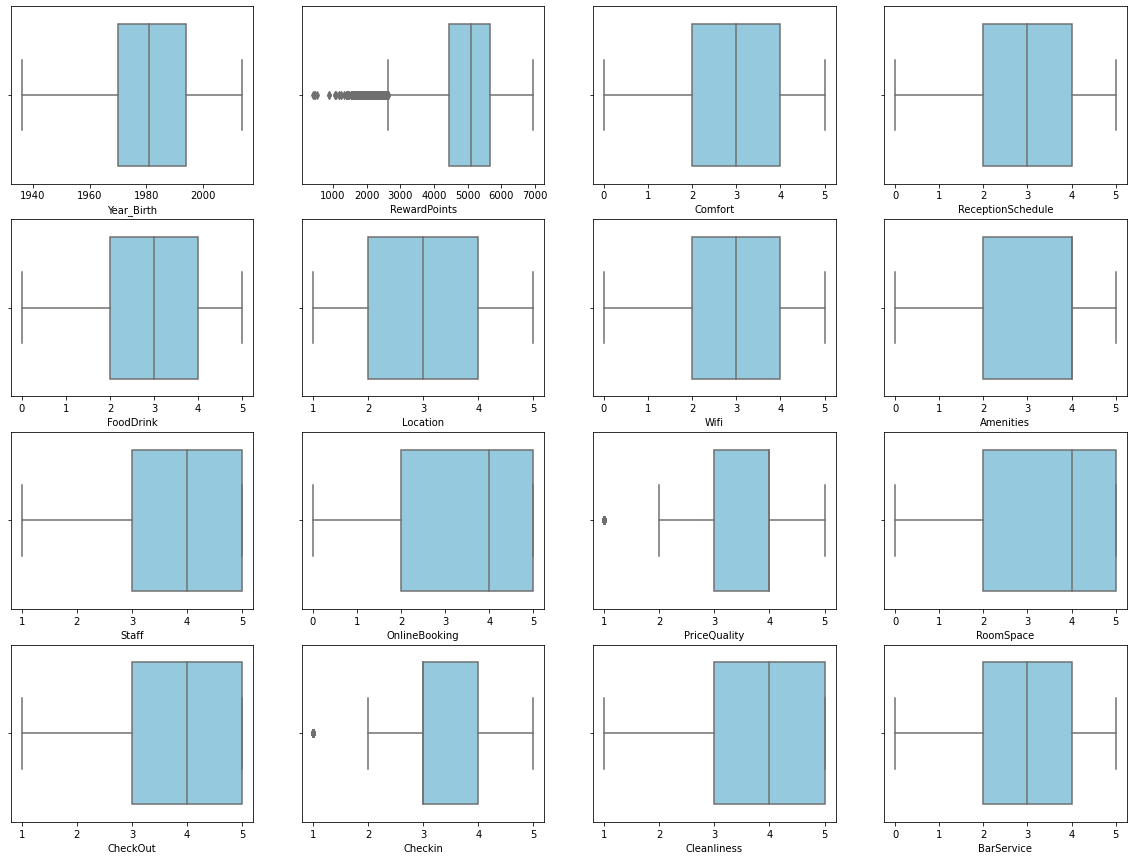

In [290]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)    
sns.boxplot(df["Year_Birth"], color="skyblue", ax=axes[0, 0])
sns.boxplot(df["RewardPoints"], color="skyblue", ax=axes[0, 1])
sns.boxplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.boxplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.boxplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.boxplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.boxplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.boxplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.boxplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.boxplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.boxplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.boxplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.boxplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.boxplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.boxplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.boxplot(df["BarService"], color="skyblue", ax=axes[3, 3])

plt.show()

In [291]:
#method to return the boundaries of IQR 
def get_IQR_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    return (lower_bound,upper_bound)

#### 2.4.1) Ouliers in Reward Points

In [292]:
df = df[df['RewardPoints'] > get_IQR_bounds(df['RewardPoints'])[0]]

print("There are been",df_original_row_size - df.shape[0], "outliers removed")

There are been 293 outliers removed


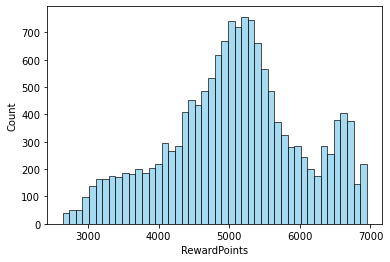

In [293]:
sns.histplot(df["RewardPoints"], color="skyblue")
plt.show()

#### 2.4.2) Outliers in Ratings Variables

After some research and analysis on the subject, we decided not to remove outliers on the two ratings variables that presented outliers in the boxplot visualization. Those are 'PriceQuality' and 'Checkin'. The reason we did not remove them was because they were too many entries that would have to be removed, and if we did, we would effectively be shortening the rating scale for the rating data.

Instead, we will look for straight lining on the ratings entries, meaning people who answered all the answers with the same variable, which can mean they were in a rush and decided to fill the survey as fast as they could.

#### 2.4.3) Outliers in Straight Lining entries to the Ratings Variables

In [294]:
straight_lining_entries = df[(df['Comfort'] == df['ReceptionSchedule']) & (df['Comfort'] == df['FoodDrink']) & (df['Comfort'] == df['Location']) & (df['Comfort'] == df['Wifi']) & (df['Comfort'] == df['Amenities']) & (df['Comfort'] == df['Staff']) & (df['Comfort'] == df['OnlineBooking']) & (df['Comfort'] == df['PriceQuality']) & (df['Comfort'] == df['RoomSpace']) & (df['Comfort'] == df['CheckOut']) & (df['Comfort'] == df['Checkin']) & (df['Comfort'] == df['Cleanliness']) & (df['Comfort'] == df['BarService'])]

In [295]:
straight_lining_entries

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1549,nochurn,Mr. Marcus Burns,yes,1981.0,business,single,5289,4,4,4,...,4,4,4,4,4,4,4,4,4,4
15260,nochurn,Mr. Randy Robbins,yes,1976.0,business,single,6699,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [296]:
df.drop(straight_lining_entries.index, axis=0, inplace=True)

We found 2 entries that are considered straight lining answers and we will remove them from the data

# 3) Feature Engineering

### 3.1) Gender Variable

In [297]:
df["Characters"] = df["Name"].str[:3]
df['Characters'].unique()

array(['Ms.', 'Mr.'], dtype=object)

In [298]:
df.drop(columns=["Characters"], axis=1, inplace=True)
df['Gender'] = ['Male' if i == 'Mr.' else 'Female' for i in df["Name"].str[:3]]

In [299]:
df.drop(columns=['Name'], inplace=True)

### 3.2) Age Variable

In [300]:
df['Age'] = date.today().year - df['Year_Birth']

In [301]:
del df['Year_Birth']

### 3.3) Rating Average Variable

In [302]:
rating_features = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService']

In [303]:
rating_features = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService']

df['Overall_Rating'] = df.apply(lambda x: round(x[rating_features].mean(), 2), axis=1)

### 3.4) Churn Variable

In [304]:
#churn = 1, nochurn = 0
df['Churn'] = [1 if i == 'churn' else 0 for i in df["Churn"]]

# 5) Data Scaling

In [305]:
target = ['Churn']
metric_features_without_ratings = ['RewardPoints', 'Age', 'Overall_Rating']

metric_features = ['RewardPoints', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'Age',
       'Overall_Rating']

metric_features_without_overall_rating = ['RewardPoints', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'Age']

non_metric_features = ['Churn', 'Longevity', 'TypeTravel', 'RoomType', 'Gender']

In [306]:
scaler = MinMaxScaler()

In [307]:
df_scaled_metric = pd.DataFrame(scaler.fit_transform(df[metric_features]), index=df[metric_features].index, columns = df[metric_features].columns)

In [308]:
df_scaled = pd.concat([df_scaled_metric, df[non_metric_features]], axis = 1)

In [309]:
df_scaled

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,...,Checkin,Cleanliness,BarService,Age,Overall_Rating,Churn,Longevity,TypeTravel,RoomType,Gender
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0.525986,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,...,0.75,0.50,0.8,0.512821,0.567282,1,yes,business,single,Female
2,0.947564,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,...,0.00,1.00,0.4,0.628205,0.527704,0,yes,business,single,Male
3,0.400232,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,...,0.25,0.50,0.2,0.525641,0.414248,1,yes,business,single,Male
4,0.280510,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,...,0.75,0.75,0.6,0.269231,0.527704,0,yes,leisure,double,Female
5,0.634803,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,...,0.00,0.50,1.0,0.320513,0.641161,0,yes,business,single,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,0.540139,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,...,0.50,0.75,0.6,0.333333,0.414248,1,no,business,double,Female
15586,0.540603,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,...,0.75,0.75,1.0,0.179487,0.641161,1,no,business,double,Female
15587,0.326218,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,...,1.00,0.75,0.8,0.641026,0.546174,0,yes,business,single,Male


# 4) Feature Selection

In [327]:
data = df_scaled[metric_features]
target = df_scaled['Churn']

### 4.1) Metric Features

In [328]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

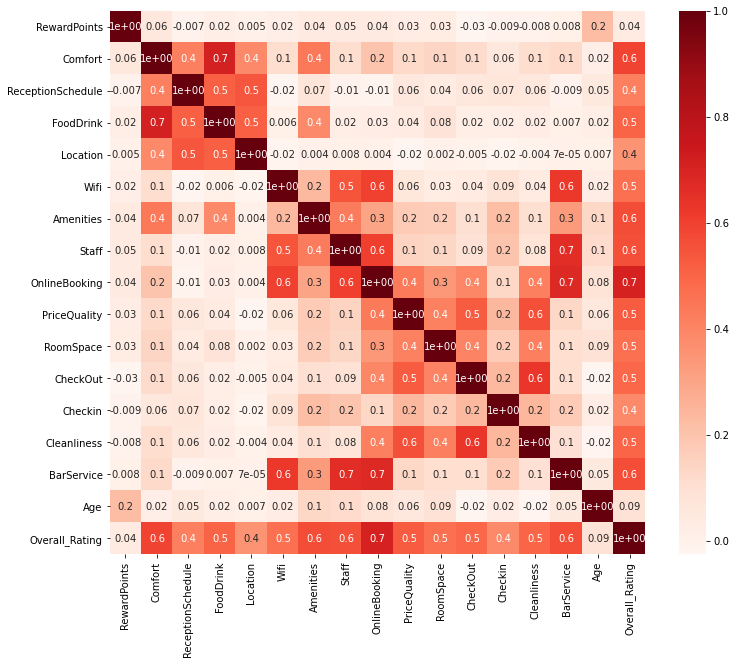

In [329]:
cor_heatmap(data.corr())

In [330]:
#RFE

In [331]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

#for each possible number of features
for n in range(len(nof_list)):
    #the data is split into training and test sets, with stratification
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data,target, test_size = 0.3, random_state = 0, stratify = target)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    
    #then the features are ranked and selected based on their importance to a logistic regression
    X_train_rfe = rfe.fit_transform(X_train1,y_train1)
    X_test_rfe = rfe.transform(X_test1)
    
    #the training partition with only the selected feature(s) is fit into a logistic regression
    model.fit(X_train_rfe,y_train1)
    
    #then the target is predicted for the test partition, and its accuracy evaluated
    #by its f1 score
    y_pred = model.predict(X_test_rfe)
    score = f1_score(y_test1, y_pred, average='micro')
    score_list.append(score)
    
    #the f1 score is saved in a list of scores, and the high score
    #and corresponding number of features are isolated
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
#The optimum number of features and the corresponding score is printed
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.796906


In [332]:
#RFE selects 5 features according to a logistic regression
rfe = RFE(estimator = model, n_features_to_select = 5)
X_rfe = rfe.fit_transform(X = data, y = target)
model = LogisticRegression().fit(X = X_rfe,y = target)
selected_features = pd.Series(rfe.support_, index = data.columns)

# Features selected with RFE
selected_features

RewardPoints         False
Comfort              False
ReceptionSchedule     True
FoodDrink             True
Location             False
Wifi                 False
Amenities             True
Staff                False
OnlineBooking        False
PriceQuality         False
RoomSpace             True
CheckOut             False
Checkin              False
Cleanliness          False
BarService           False
Age                  False
Overall_Rating        True
dtype: bool

In [333]:
#LASSO

Best alpha using built-in LassoCV: 0.000121
Best score using built-in LassoCV: 0.407498
Lasso picked 15 variables and eliminated the other 2 variables


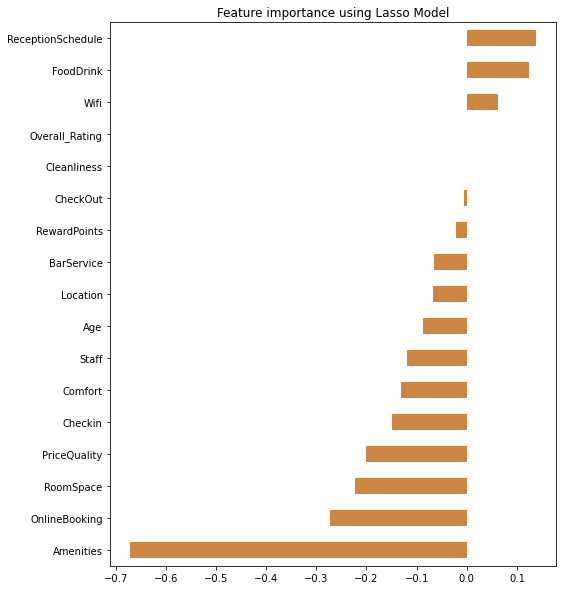

In [334]:
#barh plot created to show feature importance
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color="peru")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
reg = LassoCV()

#the best alpha, best score, and feature importance plot determined
#using LASSO are shown
reg.fit(X=data, y=target)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X = data,y = target))
coef = pd.Series(reg.coef_, index = data.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
plot_importance(coef,'Lasso')

In [341]:
# Sequential Forward Selection (SFS)

In [342]:
model = LogisticRegression()
# Stop when all features have been selected
forward = SFS(model, k_features=12, forward=True, scoring="accuracy", cv = None)

forward.fit(data, target)

SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          k_features=12, scoring='accuracy')

In [343]:
# Checking the features added at each step
forward_table = pd.DataFrame.from_dict(forward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
forward_table

,feature_idx,avg_score,feature_names
1,"(6,)",0.797372,"(Amenities,)"
2,"(0, 6)",0.797372,"(RewardPoints, Amenities)"
3,"(0, 1, 6)",0.799268,"(RewardPoints, Comfort, Amenities)"
4,"(0, 1, 4, 6)",0.796195,"(RewardPoints, Comfort, Location, Amenities)"
5,"(0, 1, 4, 6, 16)",0.792533,"(RewardPoints, Comfort, Location, Amenities, O..."
6,"(0, 1, 2, 4, 6, 16)",0.795475,"(RewardPoints, Comfort, ReceptionSchedule, Loc..."
7,"(0, 1, 2, 4, 6, 9, 16)",0.79881,"(RewardPoints, Comfort, ReceptionSchedule, Loc..."
8,"(0, 1, 2, 4, 6, 9, 15, 16)",0.798156,"(RewardPoints, Comfort, ReceptionSchedule, Loc..."
9,"(0, 1, 2, 4, 6, 9, 12, 15, 16)",0.800968,"(RewardPoints, Comfort, ReceptionSchedule, Loc..."
10,"(0, 1, 2, 3, 4, 6, 9, 12, 15, 16)",0.800968,"(RewardPoints, Comfort, ReceptionSchedule, Foo..."


In [344]:
# Iteration with the highest score
forward_table_max = forward_table['avg_score'].max()
forward_table_max

0.802406172355172

In [345]:
# Feature's names
forward_table[forward_table['avg_score']==forward_table_max]['feature_names'].values

array([('RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'PriceQuality', 'Checkin', 'Age', 'Overall_Rating')],
      dtype=object)

In [346]:
# Sequential Backward Selection (SBS)

In [347]:
# Stop when only one feature remains
backward = SFS(model, k_features=1, forward=False, scoring="accuracy", cv = None)

backward.fit(data, target)

SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          forward=False, scoring='accuracy')

In [348]:
# Checking the features removed at each step
backward_table = pd.DataFrame.from_dict(backward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
backward_table

,feature_idx,avg_score,feature_names
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.802864,"(RewardPoints, Comfort, ReceptionSchedule, Foo..."
16,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.803975,"(Comfort, ReceptionSchedule, FoodDrink, Locati..."
15,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.804172,"(Comfort, ReceptionSchedule, FoodDrink, Locati..."
14,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15)",0.804302,"(Comfort, ReceptionSchedule, FoodDrink, Locati..."
13,"(1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15)",0.804172,"(Comfort, ReceptionSchedule, FoodDrink, Locati..."
12,"(1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15)",0.803779,"(Comfort, ReceptionSchedule, FoodDrink, Wifi, ..."
11,"(1, 2, 3, 5, 6, 8, 9, 10, 12, 14, 15)",0.803714,"(Comfort, ReceptionSchedule, FoodDrink, Wifi, ..."
10,"(1, 2, 5, 6, 8, 9, 10, 12, 14, 15)",0.802537,"(Comfort, ReceptionSchedule, Wifi, Amenities, ..."
9,"(1, 2, 5, 6, 8, 9, 10, 12, 14)",0.801948,"(Comfort, ReceptionSchedule, Wifi, Amenities, ..."
8,"(1, 2, 5, 6, 8, 9, 10, 12)",0.802341,"(Comfort, ReceptionSchedule, Wifi, Amenities, ..."


In [349]:
# Iteration with the highest score
backward_table_max = backward_table['avg_score'].max()
backward_table_max

0.8043023407872368

In [350]:
# Feature's names
backward_table[backward_table['avg_score']==backward_table_max]['feature_names'].values

array([('Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'BarService', 'Age')],
      dtype=object)

In [351]:
df_scaled.columns

Index(['RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'Age',
       'Overall_Rating', 'Churn', 'Longevity', 'TypeTravel', 'RoomType',
       'Gender'],
      dtype='object')

<hr> 

### Numerical Data

| Predictor | RFE | Lasso |  SFS | SBS | Correlation | Include in the model?
| --- | --- | --- | --- |--- | --- | --- |
| RewardPoints | Discard | Keep | Discard | Keep | Keep |  Keep
| Comfort | Discard | Keep | Keep | Discard | Keep | Keep
| ReceptionSchedule | Keep | Keep | Discard | Discard | Keep | Discard
| FoodDrink | Discard | Keep | Keep | Discard | Keep |Discard 
| Location | Keep | Keep | Discard | Discard | Keep | Keep
| Wifi | Discard | Keep | Discard | Discard | Discard | Discard
| Amenities | Keep | Keep | Keep | Discard | Keep | Keep
| Staff | Discard | Keep | Keep | Keep | Discard | Keep
| OnlineBooking | Discard | Keep | Keep | Keep | Keep | Keep
| PriceQuality | Discard | Keep | Keep | Discard | Keep | Keep
| RoomSpace | Keep | Keep | Discard | Discard | Discard | Discard
| CheckOut | Discard | Keep | Keep | Discard | Discard | Discard
| Checkin | Discard | Keep | Keep | Discard | Discard | Discard
| Cleanliness | Discard | Discard | Keep | Discard | Discard | Discard
| BarService | Discard | Keep | Keep | Discard | Discard | Discard
| Age | Discard | Keep | Keep | Discard | Discard | Discard
| Overall_Rating | Keep | Discard | Keep | Discard | Discard | Discard

<hr> 

### 4.2) Non Metric Features

# 4) Creating Dummies and Binary Variables

The following variables need dummies: RoomType  
The following variables are binary: Churn, Longevity, TypeTravel

In [67]:
#churn = 1, nochurn = 0
df['Churn'] = [1 if i == 'churn' else 0 for i in df["Churn"]]

In [68]:
#yes = 1, no = 0
df['Longevity'] = [1 if i == 'yes' else 0 for i in df["Longevity"]]

In [69]:
#business = 1, leisure = 0
df['TypeTravel'] = [1 if i == 'business' else 0 for i in df["TypeTravel"]]

In [70]:
df = pd.get_dummies(df, drop_first = True)